In [1]:

import os
import sys

import numpy as np

# import tifftools
# import tifffile as tif
# from skimage import io
from tqdm import tqdm

import cv2

import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu

In [20]:
out_size = 128
step_size = 64

in_filename = "airplane/femur.png"
image = cv2.imread(in_filename, cv2.IMREAD_UNCHANGED)
mask = np.zeros_like(image)

image_height, image_width = image.shape[0:2]

T = threshold_otsu(image)

index = 1
if out_size <= image_height and out_size <= image_width:
    for pos_y in range(0, image_height - out_size + 1, step_size):
        for pos_x in range(0, image_width - out_size + 1, step_size):
            # Crop
            crop_image = image[pos_y: pos_y + out_size, pos_x:pos_x + out_size, ...]
            crop_image = np.ascontiguousarray(crop_image)

            # Check if image should be saved
            if (0.25 <= np.sum(T <= crop_image) / crop_image.size):
                mask[pos_y: pos_y + out_size, pos_x:pos_x + out_size, ...] = (index % 2 == 0)*100 + crop_image
                # plt.imshow(crop_image)
                # plt.show()
            # Save image
            # cv2.imwrite(f"{args.output_dir}/{image_file_name.split('.')[-2]}_{index:04d}.{image_file_name.split('.')[-1]}", crop_image)
            # cv2.imwrite(f"{in_filename.split('.')[-2]}_{index:04d}.bmp", crop_image)

            index += 1

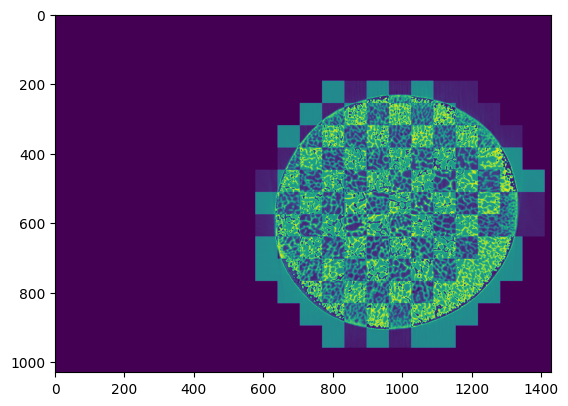

In [21]:
plt.imshow(mask)

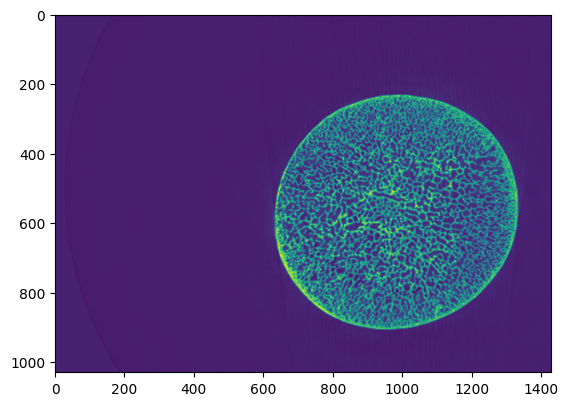

In [10]:
plt.imshow(image)

In [2]:
# Doesnt work
def combine_tiff(path:str, out:str="output.tif") -> None:
    tiff_files_li=[]
    for ti in sorted(os.listdir(path)):
        if '.tif' in ti:
            tiff_files_li.append(path + ti)
    tifftools.tiff_concat(tiff_files_li, out, overwrite=True)

# path = "data/femur/femur_01/"
# combine_tiff(path, out="data/femur/Femur.tiff")

In [8]:
path = "data/femur/femur_01/"

tiff_files = []
for file_name in tqdm(sorted(os.listdir(path))):
    if '.tif' in file_name:
        im = tif.imread(path + file_name, key=0)
        tiff_files.append(im)

tiff_files = np.array(tiff_files)

100%|██████████| 2455/2455 [00:41<00:00, 59.84it/s]


In [12]:
# Save file
tif.imwrite('data/femur/Femur.tif', tiff_files, bigtiff=True)

### Test if read works

In [27]:
im = tif.imread("data/femur/Femur.tif")

In [7]:
print(f"Takes up: {sys.getsizeof(im) * 1.25E-7} mb")

Takes up: 902.992263 mb
